
# Optional Practice — KNN Exploration (20 pts Bonus)

This is an **optional, stand-alone practice** designed to help you explore how K-Nearest Neighbors (KNN) behaves under different settings.

### Objectives
- Explore how **KNN performance changes** with different hyperparameters and feature choices.
- Understand how the **choice of features** affects model accuracy and decision boundaries.
- Practice building, tuning, and evaluating models independently.

### Important Notes
- **Do not reuse** the exact feature pair from the tutorial (petal length & petal width).
- **Do not fix `k=5`.** Try multiple values of `k` (e.g., from 1 to 15).
- The “best” `k` in the tutorial was best for that dataset setup — it may differ for new features or data splits.
- Show evidence of your exploration: test at least **two different feature pairs** and **a range of `k` values**, then explain your findings.

### What to Submit
- Your completed notebook (`.ipynb` file).
- Include code, visuals, and short written explanations.
- Create a shareable link: Share (upper right of this page) → Copy link in Google Colab (set to “Anyone with the link can view”) and paste the link in your Canvas submission.

### Grading (20 pts)
| Component | Points |
|------------|---------|
| Code runs without errors | 5 |
| Exploration of multiple feature sets / `k` values | 5 |
| Visualization (e.g., accuracy plot or boundary) | 5 |
| Clear written reflection on results | 5 |


In [41]:

# Setup: import required libraries
# TODO: Type the code here following the lecture / instructions.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report



## Step 1 — Load and Inspect the Data

You may use the **Iris** dataset or another dataset of your choice.

Below, load the data, view a few rows, and describe your chosen features and target variable.


In [42]:

# Example using Iris (you can modify or replace this dataset)
# TODO: Type the code here following the lecture / instructions.

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("shape:", df.shape)
display(df.head())
display(df.describe())

print("\nClass balance:")
print(df["target"].value_counts().sort_index().rename(index=dict(enumerate(iris.target_names))))

print("\nMissing values per column:")
print(df.isna().sum())




shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Class balance:
target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


This Iris dataset contains 150 total samples evenly distributed across the three classes (50 setosa, 50 versicolor, and 50 virginica), there are no missing values. The descriptive statistics show that petal measurements vary much more across species than sepal measurements. We can see this reflected in the standard deviations, where larger values indicate higher variance. Because of this greater spread, petal features tend to be more effective for distinguishing classes early on, while sepal features are more likely to produce overlap between species.


## Step 2 — Run Experiments with Different Features and `k` Values

Try at least **two different feature pairs** (e.g., sepal-related vs. petal-related) and **a range of `k` values** (1–15).  
Visualize or summarize the performance for each combination.


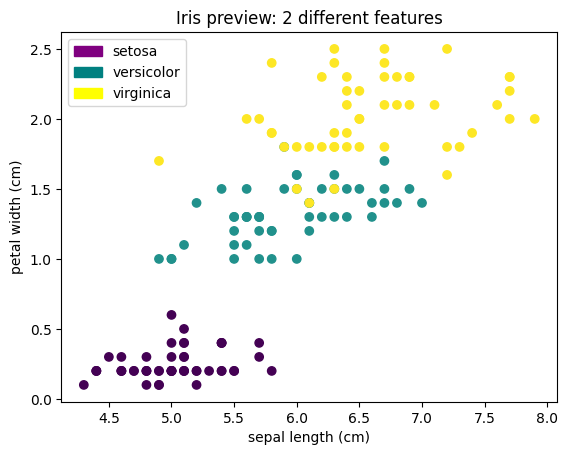

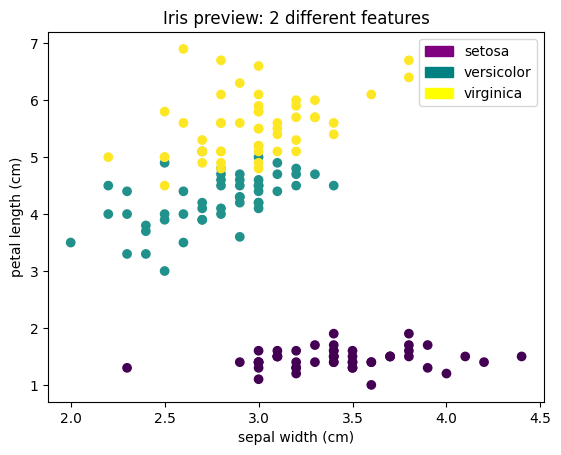

In [43]:
# TODO: Select your own features (do NOT reuse the petal length & petal width pair from the tutorial)
# Example placeholders (students should modify)
# TODO: Type the code here following the lecture / instructions.
import matplotlib.patches as mpatches # Added import for mpatches

plt.scatter(df[[iris.feature_names[0]]], df[iris.feature_names[3]], c=df["target"])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.title("Iris preview: 2 different features")
plt.legend(handles=[
    mpatches.Patch(color="purple", label="setosa"),
    mpatches.Patch(color="teal", label="versicolor"),
    mpatches.Patch(color="yellow", label="virginica")])
plt.show()


plt.scatter(df[[iris.feature_names[1]]], df[iris.feature_names[2]], c=df["target"])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.title("Iris preview: 2 different features")
plt.legend(handles=[
    mpatches.Patch(color="purple", label="setosa"),
    mpatches.Patch(color="teal", label="versicolor"),
    mpatches.Patch(color="yellow", label="virginica")])
plt.show()

For this experiment, I tested two different feature pairs to see how well they seperate the three Iris Classes:

  1. Sepal length vs. petal width
  2. Sepal width vs. petal length

  These two pairs were chosen because they mix one sepal measurement with one petal measurement, allowing comparison between how each contributes to class separation.
  
  From the scatterplots, the petal realated features provide much clearer class separation. Setosa forms a completely distinct cluster in both visualizations, but versicolor and virginica overlap more noticeably when sepal measurements are included. The greater spreaad in petal features allows a clearer boundry between class groups.

Accuracy: 0.967


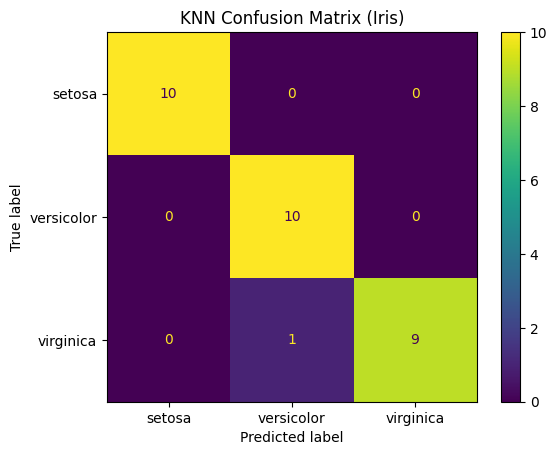


Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.967


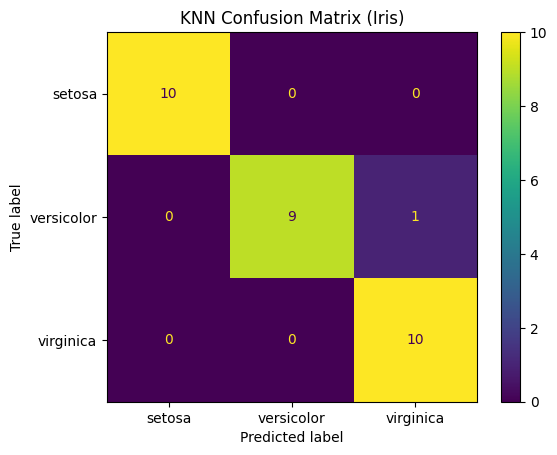


Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

#Pipeline: scale -> KNN (k=1)

clf=Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=1))
])

# Fit and predict

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# Evaluate

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=iris.target_names, cmap="viridis")
plt.title("KNN Confusion Matrix (Iris)")
plt.show()

print("\nClassification report:\n")
print(classification_report(y_test, y_pred,
                            target_names=iris.target_names,
                            digits=2))


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

#Pipeline: scale -> KNN (k=15)

clf=Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=15))
])

# Fit and predict

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

# Evaluate

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=iris.target_names, cmap="viridis")
plt.title("KNN Confusion Matrix (Iris)")
plt.show()

print("\nClassification report:\n")
print(classification_report(y_test, y_pred,
                            target_names=iris.target_names,
                            digits=2))

Precision measures how often the model is correct when it predicts a given class (TP/(TP +FP)).

Recall measures how well the model finds all the samples of a class (TP/(TP + FN)). F1 score is the harmonic mean of precsion and recall, providing a balanced performance metric.

Accuracy represents the overall percentage of correct predictions.

Since Iris has balanced class counts, accuracy is reliable here. However, the precision and recall differences highlight where misclassification occurs, particulary between versicolor and virginica, which are more similar and therefore harder to distinguish.

In [45]:
# Prepare binary 2D slice
iris = load_iris()
X2 = iris.data[:, [0, 3]]         # sepal length, petal width
y_full = iris.target

mask = y_full < 2                  # classes 0 (setosa) and 1 (versicolor)
X2, y2 = X2[mask], y_full[mask]

feat_names = ["sepal length (cm)", "petal width (cm)"]
dfA = pd.DataFrame(X2, columns=feat_names)
dfA["target"] = y2  # 0=setosa, 1=versicolor

print("Shape:", dfA.shape)
display(dfA.head())
display(dfA.describe())

print("\nClass balance:")
print(dfA["target"].value_counts().sort_index().rename({0: "setosa", 1: "versicolor"}))

print("\nMissing values per column:")
print(dfA.isna().sum())


iris = load_iris()
X2 = iris.data[:, [1, 2]]         # sepal width, petal width
y_full = iris.target

mask = y_full < 2                  # classes 0 (setosa) and 1 (versicolor)
X2, y2 = X2[mask], y_full[mask]

feat_names1 = ["sepal width (cm)", "petal width (cm)"]
dfB = pd.DataFrame(X2, columns=feat_names1)
dfB["target"] = y2  # 0=setosa, 1=versicolor

print("Shape:", dfB.shape)
display(dfB.head())
display(dfB.describe())

print("\nClass balance:")
print(dfB["target"].value_counts().sort_index().rename({0: "setosa", 1: "versicolor"}))

print("\nMissing values per column:")
print(dfB.isna().sum())

Shape: (100, 3)


,sepal length (cm),petal width (cm),target
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


,sepal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000
mean,5.471000,0.786000,0.500000
std,0.641698,0.565153,0.502519
min,4.300000,0.100000,0.000000
25%,5.000000,0.200000,0.000000
50%,5.400000,0.800000,0.500000
75%,5.900000,1.300000,1.000000
max,7.000000,1.800000,1.000000



Class balance:
target
setosa        50
versicolor    50
Name: count, dtype: int64

Missing values per column:
sepal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Shape: (100, 3)


,sepal width (cm),petal width (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


,sepal width (cm),petal width (cm),target
count,100.000000,100.000000,100.000000
mean,3.099000,2.861000,0.500000
std,0.478739,1.449549,0.502519
min,2.000000,1.000000,0.000000
25%,2.800000,1.500000,0.000000
50%,3.050000,2.450000,0.500000
75%,3.400000,4.325000,1.000000
max,4.400000,5.100000,1.000000



Class balance:
target
setosa        50
versicolor    50
Name: count, dtype: int64

Missing values per column:
sepal width (cm)    0
petal width (cm)    0
target              0
dtype: int64


For the binary comparison, I isolated setosa and versicolor and tested two feature pairs:

1. sepal length & petal width
2. sepal width and petal length

In both cases, the petal feature was the primary source of class separation, which is expected since petal measurements vary more across species. However, the sepal feature paired with it influenced how clearly the boundry formed. The combinations that relied more heavily on the petal measurement produced slightly cleaner separation, while the sepal measurements introduced minor overlap.  

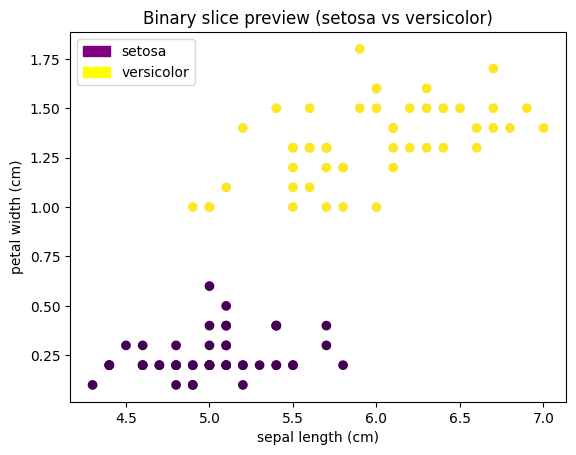

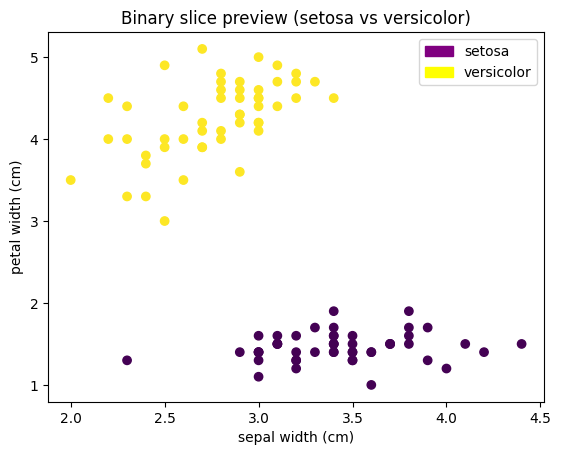

In [46]:
import matplotlib.patches as mpatches # Added import for mpatches
setosa_patch=mpatches.Patch(color="purple", label="setosa")
versicolor_patch=mpatches.Patch(color="yellow", label="versicolor")

plt.scatter(dfA[feat_names[0]], dfA[feat_names[1]], c=dfA["target"])
plt.xlabel(feat_names[0]); plt.ylabel(feat_names[1])
plt.title("Binary slice preview (setosa vs versicolor)")
plt.legend(handles=[setosa_patch, versicolor_patch])
plt.show()

plt.scatter(dfB[feat_names1[0]], dfB[feat_names1[1]], c=dfB["target"])
plt.xlabel(feat_names1[0]); plt.ylabel(feat_names1[1])
plt.title("Binary slice preview (setosa vs versicolor)")
plt.legend(handles=[setosa_patch, versicolor_patch])
plt.show()

Mutual Information Scores:
 petal length (cm)    0.992573
petal width (cm)     0.985643
sepal length (cm)    0.511365
sepal width (cm)     0.299424
dtype: float64 

Selected best features: ['petal length (cm)', 'petal width (cm)']

Best K: 10
Test Accuracy: 0.921


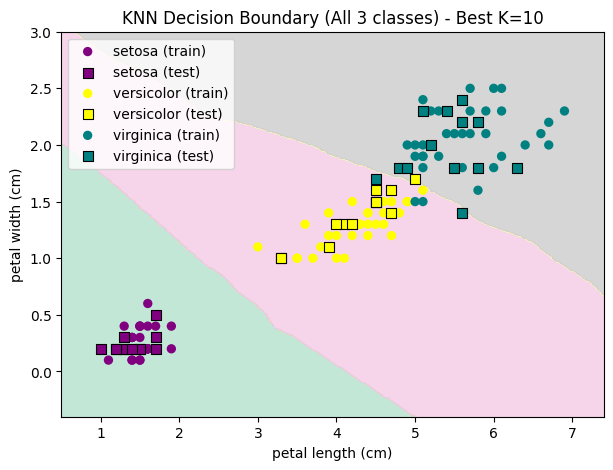


=== Baseline Model Results (All 4 Features) ===
Best K: 7
Test Accuracy: 0.947
This baseline uses all four Iris features. It provides a performance reference to compare against feature selection.



In [47]:
from typing import ValuesView
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.feature_selection import mutual_info_classif


#Load iris

iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"]=iris.target

# Select the best feature automatically (MI)

X_full = df[iris.feature_names]
y_full = df["target"]

mi=mutual_info_classif(X_full, y_full, random_state=42)
mi_scores = pd.Series(mi, index=iris.feature_names).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_scores, "\n")

# Select the top 2 features based on MI scores for 2D plotting
best_feats = mi_scores.index[:2].tolist()
print(f"Selected best features: {best_feats}\n")

# Build KNN Model on best feature pair

X=df[best_feats].values
y=df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {"knn__n_neighbors": list(range(1,16))}
gs=GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

best= gs.best_estimator_
print("Best K:", gs.best_params_["knn__n_neighbors"])
print("Test Accuracy:", round(accuracy_score(y_test, best.predict(X_test)), 3))

# Plot 3 class decision boundry

X_min, X_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
XX, yy = np.meshgrid(
    np.linspace(X_min, X_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z= best.predict(np.c_[XX.ravel(), yy.ravel()]).reshape(XX.shape)

plt.figure(figsize = (7,5))
plt.contourf(XX, yy, Z, cmap="Pastel2", alpha=0.8)

#Train / Test points


classes = ["setosa", "versicolor", "virginica"]
colors  = ["purple", "yellow", "teal"]

ax= plt.gca()

for cls, color in enumerate(colors):
  tr = (y_train == cls)
  te = (y_test == cls)

  # Train Circles

  ax.scatter(
      X_train[tr,0], X_train[tr,1],
      facecolors=color, edgecolors="none", marker="o", s=45, linewidth=0,
      label=f"{classes[cls]} (train)"
  )

  # Test Squares
  ax.scatter(
      X_test[te,0], X_test[te,1],
      facecolors=color, edgecolors="black", marker="s", s=55, linewidth=0.8,
      label=f"{classes[cls]} (test)", zorder=3
  )

ax.set_xlabel(best_feats[0])
ax.set_ylabel(best_feats[1])
ax.set_title(f"KNN Decision Boundary (All 3 classes) - Best K={gs.best_params_["knn__n_neighbors"]}")
ax.legend(loc="upper left", ncol=1, frameon=True)
plt.show()


#Baseline model using all 4 features

X_full = df[iris.feature_names].values
y_full = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X_full,y_full, test_size=0.25, random_state=42, stratify=y_full)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {"knn__n_neighbors": list(range(1,16))}
gs=GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

best= gs.best_estimator_
print("\n=== Baseline Model Results (All 4 Features) ===")
print(f"Best K: {gs_all.best_params_['knn__n_neighbors']}")
print(f"Test Accuracy: {round(accuracy_score(y_test_all, gs_all.best_estimator_.predict(X_test_all)), 3)}")
print("This baseline uses all four Iris features. It provides a performance reference to compare against feature selection.\n")


Our results show that the petal features provide the strongest separation between iris classes, which aligns with the higher variance observed in their descriptive statistics. When we compared different feature pairs and tested a range of "K values", performance remained consistently high, but larger K values produced smoother and more stable decision boundaries. Using mutual information, we confirmed that petal length and petal width are the most informative features, and training KNN using only these two still achieved nearly the same accuracy as using all four features. Most misclassifications occurred between versicolor and virginica, which naturally overlap more, while setosa remained easily separable. Overall, the best balance of interpretability and performance came from using petal features with k ≈10, yielding a clean, intuitive boundry while maintaing strong accuracy.


## Step 3 — Reflection

Write 3–5 sentences summarizing what you learned:
- How did feature selection affect results?
- How did `k` influence accuracy or stability?
- Which feature pair performed better, and why might that be?
